Problem (6a)
(3 points) Assuming that the missing value (marked with “?”) in GDPPC cannot
be ignored, discuss 3 diﬀerent alternatives to fill in that missing value. In each case,
state what the selected value would be and the advantages and disadvantages of
the approach. You may assume that the SWL attribute is the target attribute.

Approach 1: Assume the value is the mean of the other values
pro: 
con:

Approach 2: Try and predict the value based on Life-EXP and AC-S-ED to see if there is corellation
pro:
con:



Problem (6b)
 (3 points) Would you keep the attribute COUNTRY in your dataset when mining
for patterns that predict the values for the SWL attribute? Explain your answer.

I wouldn't keep it.  Because it is a discrete value and unique to each row it isn't useful in predicting the answer

(7a) (2 points) Make the attributes mpg, displacement, horsepower, weight, and accel-
eration continuous. Make the attributes cylinders, model-year, and origin discrete;
Make the attribute car-name string.

In [6]:


import pandas as pd

df = pd.read_csv('auto-mpg.csv')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [7]:
for attr in [ 'mpg', 'displacement', 'horsepower', 'weight', 'acceleration' ]:
    df[attr] = pd.to_numeric(df[attr], downcast='float', errors='coerce')


for attr in [ 'cylinders', 'model year', 'origin' ]:
    df[attr] = pd.to_numeric(df[attr], downcast='integer', errors='coerce')

df['car name'] = df['car name'].astype(str)

df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


(2 points) Start by familiarizing yourself with the dataset. Carefully look at the
data directly (for this, use Python functionality to explore and visualize the data).
Describe in your report your observations about what is good about this data
(mention at least 2 diﬀerent good things), and what is problematic about this data
(mention at least 2 diﬀerent bad things). If appropriate, include visualizations of
those good/bad things.

(c) (2 points) For the horsepower attribute:
1. Calculate the percentiles in increments of 10, the mean, median, range, and
variance.
2. Plot a histogram of the attribute using 10 or 20 bins.

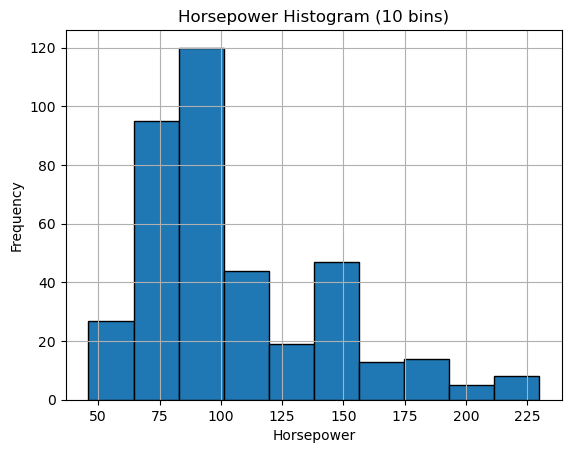

In [9]:
import matplotlib.pyplot as plt

df.hist(column='horsepower', bins=10, edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Horsepower Histogram (10 bins)")
plt.show()

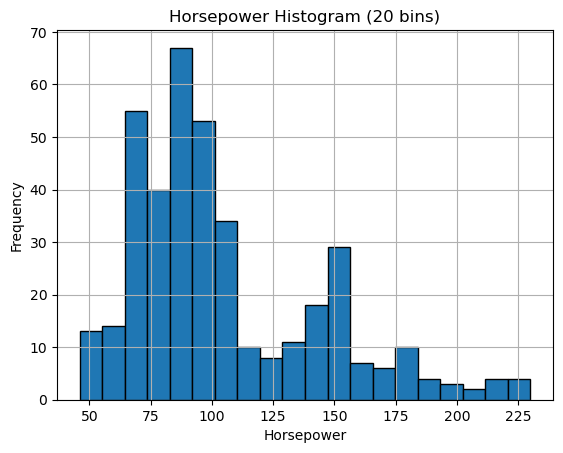

In [10]:
df.hist(column='horsepower', bins=20, edgecolor='black')
plt.xlabel("Horsepower")
plt.ylabel("Frequency")
plt.title("Horsepower Histogram (20 bins)")
plt.show()

In [11]:
df.cov(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,61.089610,-10.308911,-655.402314,-233.857924,-5505.211705,9.058929,16.741163,3.532185
cylinders,-10.308911,2.893415,168.623214,55.348244,1290.695575,-2.370842,-2.193499,-0.767477
displacement,-655.402314,168.623214,10872.199152,3614.033744,82368.423240,-156.332975,-142.717137,-50.964989
horsepower,-233.857924,55.348244,3614.033744,1481.569393,28265.620231,-73.186967,-59.036432,-14.112741
weight,-5505.211705,1290.695575,82368.423240,28265.620231,717140.990526,-974.899000,-959.946344,-394.639330
acceleration,9.058929,-2.370842,-156.332975,-73.186967,-974.899000,7.604848,2.938105,0.455354
model year,16.741163,-2.193499,-142.717137,-59.036432,-959.946344,2.938105,13.672443,0.535790
origin,3.532185,-0.767477,-50.964989,-14.112741,-394.639330,0.455354,0.535790,0.643292


In [12]:
df.corr(numeric_only=True)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.455171,-0.581024,0.205873,0.180662,1.000000


I'd likely remove weight and cylindars
Weight is highly correlated to both displacement and weight, while cylinders is highly correlated to displacement and horsepower

Keeping both horesepower and displacement seem like a very good choice.

(f) (10 points) Apply Principal Components Analysis to reduce the dimensionality of
the full dataset. How many dimensions does the original dataset contain? How
many dimensions are obtained after PCA? How much of the variance do they ex-
plain? Include in your report the linear combinations that define the first new
attribute (= component) obtained. Look at the results and elaborate on any inter-
esting observations you can make about the results.

In [13]:
# first we scale the values
from sklearn.preprocessing import StandardScaler
numeric_df = df.dropna().drop('car name', axis=1)
scaled_dataset = StandardScaler().fit_transform(numeric_df)
scaled_df = pd.DataFrame(scaled_dataset, columns=numeric_df.columns)
scaled_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.716641
1,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.716641
2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.716641
3,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.716641
4,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.716641
...,...,...,...,...,...,...,...,...
387,0.455941,-0.864014,-0.520637,-0.480448,-0.221125,0.021295,1.636410,-0.716641
388,2.636813,-0.864014,-0.932079,-1.364896,-0.999134,3.287676,1.636410,0.526382
389,1.097374,-0.864014,-0.568479,-0.532474,-0.804632,-1.430430,1.636410,-0.716641
390,0.584228,-0.864014,-0.712005,-0.662540,-0.415627,1.110088,1.636410,-0.716641


In [16]:
import numpy as np
np.mean(scaled_df, axis=0), np.std(scaled_df, axis=0)

(mpg             0.000000e+00
 cylinders      -1.946274e-08
 displacement    3.892548e-08
 horsepower      0.000000e+00
 weight         -9.731370e-09
 acceleration    9.731370e-09
 model year     -3.892548e-08
 origin          2.919411e-08
 dtype: float32,
 mpg             1.000000
 cylinders       1.000000
 displacement    1.000000
 horsepower      0.999999
 weight          1.000000
 acceleration    1.000000
 model year      0.999999
 origin          1.000001
 dtype: float32)

In [17]:
from sklearn.decomposition import PCA

pca = PCA()
pca_mpg = pca.fit_transform(scaled_df)
print(pca.explained_variance_ratio_)

pca_mpg_df = pd.DataFrame(data=pca_mpg)
pca_mpg_df

[0.671984   0.11795797 0.10145542 0.0607696  0.02285325 0.01429019
 0.00669331 0.00399626]


,0,1,2,3,4,5,6,7
0,2.718381,-0.953769,0.213584,-0.522011,0.786392,-0.472257,0.105545,-0.118489
1,3.541591,-1.061426,-0.035226,-0.336238,0.502549,-0.001474,-0.219928,0.068837
2,3.035162,-1.166695,-0.149182,-0.650136,0.749529,-0.218685,-0.138754,-0.089263
3,2.980879,-1.052718,0.167823,-0.464961,0.554874,-0.244316,-0.285930,-0.156926
4,2.970571,-1.239286,-0.154936,-0.773731,0.610287,-0.473950,0.015009,-0.177510
...,...,...,...,...,...,...,...,...
387,-1.178756,1.354617,-0.646015,-0.780454,-0.624904,0.177401,0.149545,0.042636
388,-4.069557,2.142579,0.661799,1.122465,1.301928,0.764484,-0.251225,0.024486
389,-1.317096,0.675167,-1.746467,-1.760898,-0.225419,-0.040719,0.210015,0.065881
390,-1.747467,1.773452,0.069717,-0.367225,-0.440681,0.282104,-0.133691,-0.007673


Text(0.5, 1.0, 'n_components vs. Explained Variance Ratio')

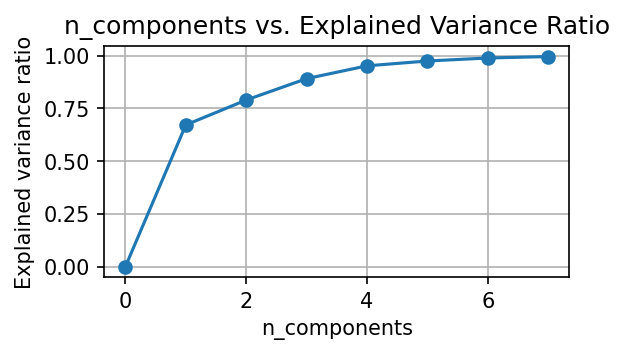

In [18]:
var_ratio = []
nums = range(8)

for num in nums:
  pca = PCA(n_components=num)
  pca.fit(scaled_df)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))
 
import matplotlib.pyplot as plt

plt.figure(figsize=(4,2),dpi=150)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')

In [27]:
# show the constituant components for each of the components (0-7) 
print(pd.DataFrame(pca.components_,columns=scaled_df.columns))


        mpg  cylinders  displacement  horsepower    weight  acceleration  \
0 -0.385862   0.402388      0.416444    0.401836  0.401576     -0.264731   
1  0.076632   0.138429      0.126324   -0.111481  0.211019      0.416904   
2 -0.292286  -0.072240     -0.074237   -0.236055  0.000893      0.639433   
3 -0.099983   0.216034      0.135814    0.119717  0.322469      0.492809   
4  0.740367   0.482615      0.303316   -0.084266 -0.131273      0.097733   
5  0.387350  -0.530931     -0.006990    0.666707  0.235859      0.202932   
6  0.195883  -0.278788      0.084245   -0.535055  0.722014     -0.228913   

   model year    origin  
0   -0.213868 -0.277868  
1    0.690460 -0.501503  
2   -0.587192 -0.307322  
3    0.106021  0.743282  
4   -0.301344 -0.047394  
5   -0.110025 -0.120867  
6   -0.125014  0.034528  


Based on this it seems like for our top component all of the values are involved.  But that cylindars, displacement, horsepower and weight are most closely correlated.